## Importing the necessary libraries

In [21]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

## Reading The Data

In [22]:
import os
import pandas as pd
import numpy as np
from pathlib import Path

directory = Path('/kaggle/input/a-large-scale-fish-dataset')
filepaths = list(directory.glob(r'**/*.png'))
Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))


filepaths = pd.Series(filepaths, name='FilePaths').astype(str)
Labels = pd.Series(Labels, name='Labels').astype(str)

img_data = pd.merge(filepaths, Labels, right_index = True, left_index = True)

img_data = img_data[ img_data['Labels'].apply(lambda x: x[-2:]!='GT') ]


img_data=img_data.sample(frac = 1).reset_index(drop=True)
img_data.head()

,FilePaths,Labels
0,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Gilt-Head Bream
1,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
2,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Sea Bass
3,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Striped Red Mullet
4,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Mullet


## Displaying The Data

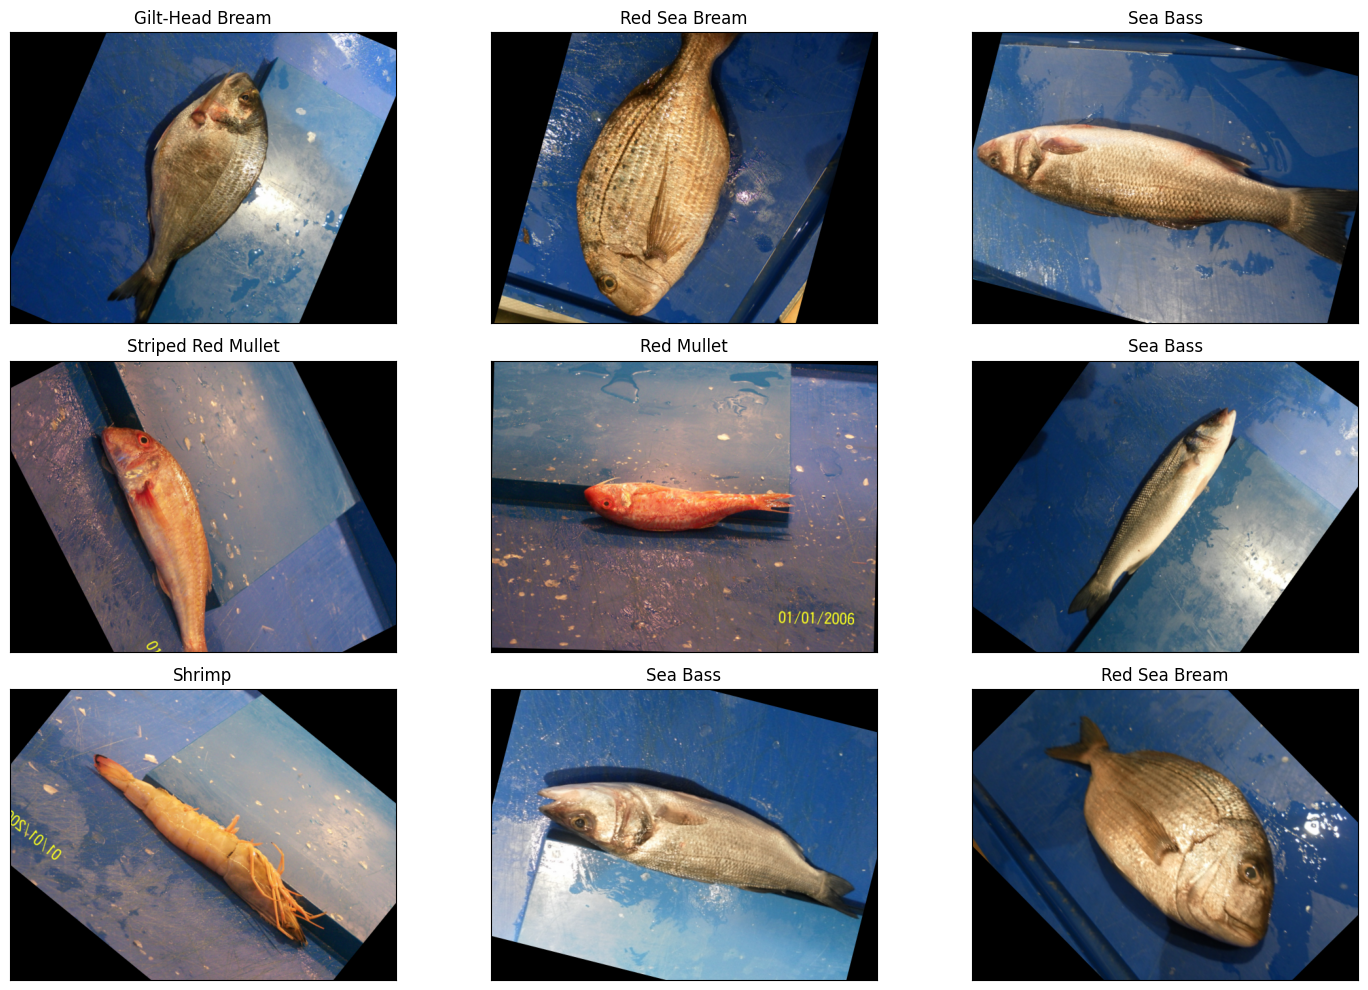

In [23]:
import matplotlib.pyplot as plt

block, block1 = plt.subplots(nrows=3, ncols=3, figsize=(15,10), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(block1.flat):
    ax.imshow(plt.imread(img_data.FilePaths[i]))
    ax.set_title(img_data.Labels[i])

plt.tight_layout()
plt.show()

## Spliting

In [24]:
from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn.model_selection import train_test_split 

train_ratio = 0.75
validation_ratio = 0.10
test_ratio = 0.15


x_train, x_test = train_test_split(img_data, test_size=1 - train_ratio)
x_val, x_test = train_test_split(x_test, test_size=test_ratio/(test_ratio + validation_ratio)) 


print(f'Length of datasets {len(img_data)}')
print(f'Length of x_train: {len(x_train)}')
print(f'Length of x_val: {len(x_val)}')
print(f'Length of x_test: {len(x_test)}')

Length of datasets 9281
Length of x_train: 6960
Length of x_val: 928
Length of x_test: 1393


## Creating The Model For The Neural Network

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

model = Sequential()

# Input Layer (Flatten ile)
model.add(Flatten(input_shape=(224, 224, 3)))

# Hidden Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

# Çıkış katmanı (Sınıflandırma için Softmax)
model.add(Dense(len(categories), activation='softmax'))

# Modeli derle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training The Model ANN

In [36]:
Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
results = model.fit(x_train,
                validation_data = x_val,
                epochs = 10, callbacks=Callback)

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_4_1/Cast:0", shape=(None, 2), dtype=float32). Expected shape (None, 224, 224, 3), but input has incompatible shape (None, 2)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 2), dtype=string)
  • training=True
  • mask=None

## Displaying The Graphs

In [33]:
accuracy = results.history['accuracy']
loss = results.history['loss']
validation_loss = results.history['val_loss']
validation_accuracy = results.history['val_accuracy']



plt.figure(figsize=(17, 7))
plt.subplot(2, 2, 1)
plt.plot(range(10), accuracy, label='Training Accuracy')
plt.plot(range(10), validation_accuracy, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy : Training Vs Validation ')



plt.subplot(2, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), validation_loss, label='Validation Loss')
plt.title('Loss : Training Vs Validation ')
plt.legend(loc='upper right')
plt.show()

NameError: name 'X_test' is not defined

## Accuracy Test

In [37]:
test_accuracy = model.evaluate(x_test)[1] * 100
print('Test accuracy is : ',test_accuracy, '%' )

ValueError: could not convert string to float: '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream/00314.png'